# 4장 표본분포에 대한 이해 Quiz

In [1]:
# 한글 깨짐 설정 (설정 후 런타임 재시작 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# default option 지정
# plt.rcParams['figure.figsize'] = (8, 5)
# plt.rcParams['figure.dpi'] = 100
# plt.style.use("ggplot")
# plt.rcParams['axes.grid'] = True
# plt.rcParams["patch.force_edgecolor"] = True
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings("ignore")

## 데이터셋 불러오기 : Hotel 데이터셋
<br>

> **hotel 데이터셋 설명 (Description)** <br>
호텔 숙박 플랫폼에 등록된 예약 정보 데이터
- 이전에 플랫폼을 사용하여 예약한 경험 + 취소 이력이 없는 사람으로 이루어진 데이터셋

- `hotel` : 호텔 종류
- `is_canceled` : 예매 취소 여부
- `lead_time` : 예매한 날짜와 도착 날짜 사이에 경과된 일수
- `arrival_date_year` : 도착 연도
- `arrival_date_month` : 도착 월
- `arrival_date_week_number` : 도착한 주 (e.g. 5주차)
- `arrival_date_day_of_month` : 도착한 날짜(일)
- `stays_in_weekend_nights` : 총 숙박 기간 중 주말 숙박의 개수

- `stays_in_week_nights` : 총 숙박 기간 중 주중 숙박의 개수
- `adults` : 숙박 고객 중 어른의 숫자
- `children` : 숙박 고객 중 아이의 숫자
- `deposit_type` : 보증금 종류
- `days_in_waiting_list` : 고객이 예약을 확정하기 전 대기 리스트에 있던 일수
- `adr` : 일일 평균 객실료 (모든 숙박 거래의 합계를 총 숙박 일수로 나눈 평균 일 요금)
- `arrival_date` : 도착 날짜
- `arrival_day` : 도착 요일
- `reservation_status` : 예약 상태
- `reservation_status_date` : 예약 상태가 변화한 날짜
- `status_changed_day` : 예약 상태가 변화한 요일

In [3]:
hotel = pd.read_csv('hotel.csv')

In [4]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,deposit_type,days_in_waiting_list,adr,arrival_date,arrival_day,reservation_status,reservation_status_date,status_changed_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,No Deposit,0,0.0,2015-07-01,Wednesday,Check-Out,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,No Deposit,0,0.0,2015-07-01,Wednesday,Check-Out,2015-07-01,Wednesday
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0.0,No Deposit,0,75.0,2015-07-01,Wednesday,Check-Out,2015-07-02,Thursday
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0.0,No Deposit,0,75.0,2015-07-01,Wednesday,Check-Out,2015-07-02,Thursday
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0.0,No Deposit,0,98.0,2015-07-01,Wednesday,Check-Out,2015-07-03,Friday


## 1. 큰 수의 법칙 (Law of Large Numbers)

- 무작위 column을 선택하여, 분포를 확인하고 큰 수의 법칙을 시각화 해보세요

    - 큰 수의 법칙은 원래 무한대로 진행할 때 표본평균이 모평균에 가까워 진다는 것이 전제이지만, 데이터셋을 바탕으로 모평균에 얼마나 가까워지는지 확인해보세요



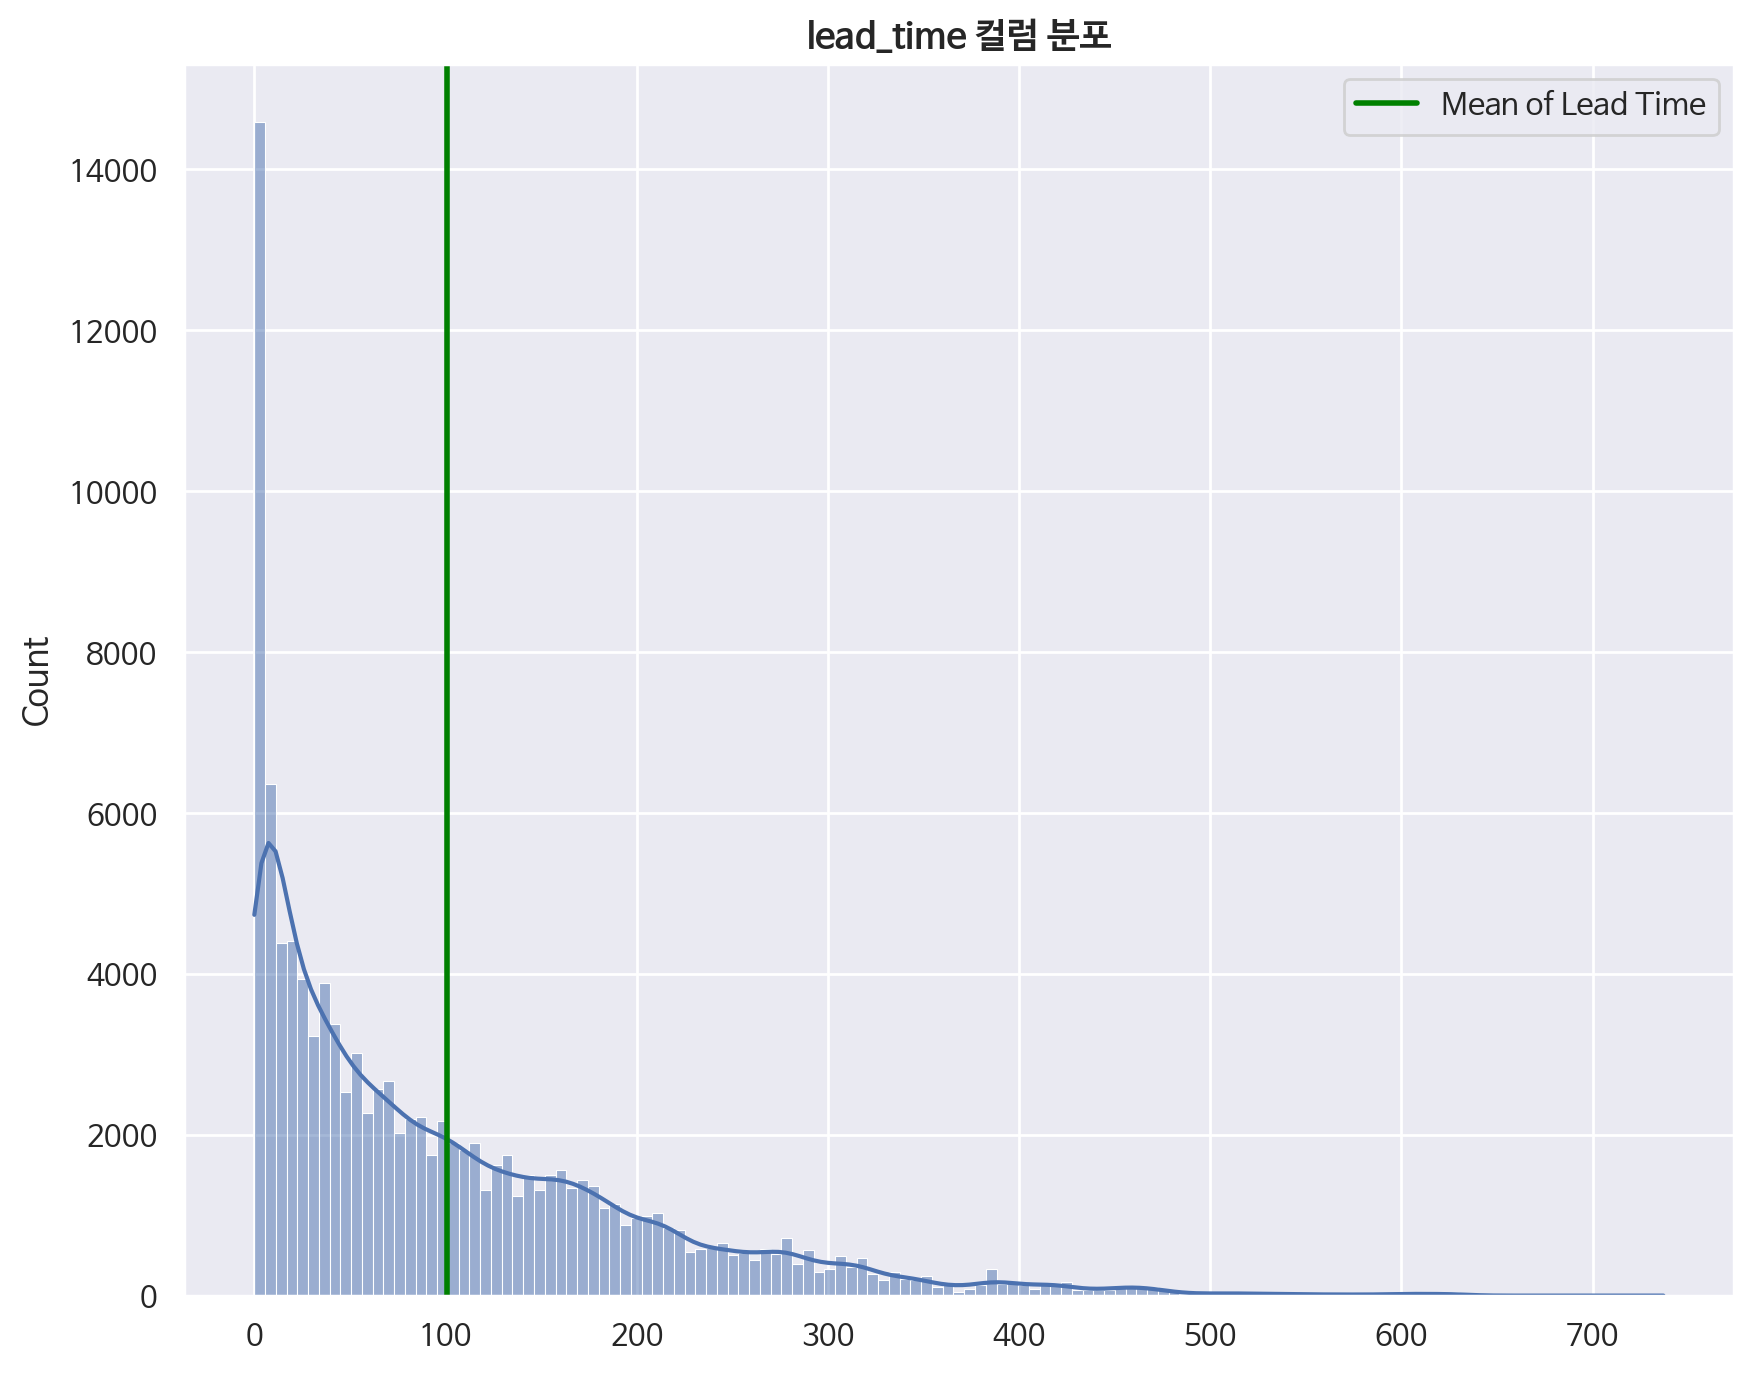

In [5]:
# 무작위 column의 분포와 평균을 확인하고, histplot으로 시각화 해보세요

# lead_time 컬럼 분포 및 평균 비교
lead_time_mean = hotel["lead_time"].mean()

plt.figure(figsize=(10,8))
lead_time_value = hotel["lead_time"].values
sns.histplot(lead_time_value, kde=True)
# lead_time 평균을 초록 선으로 표시
plt.axvline(lead_time_mean, c="green", lw=2, label="Mean of Lead Time")
plt.title("lead_time 컬럼 분포", fontsize=13, fontweight="bold")
plt.legend()
plt.show()

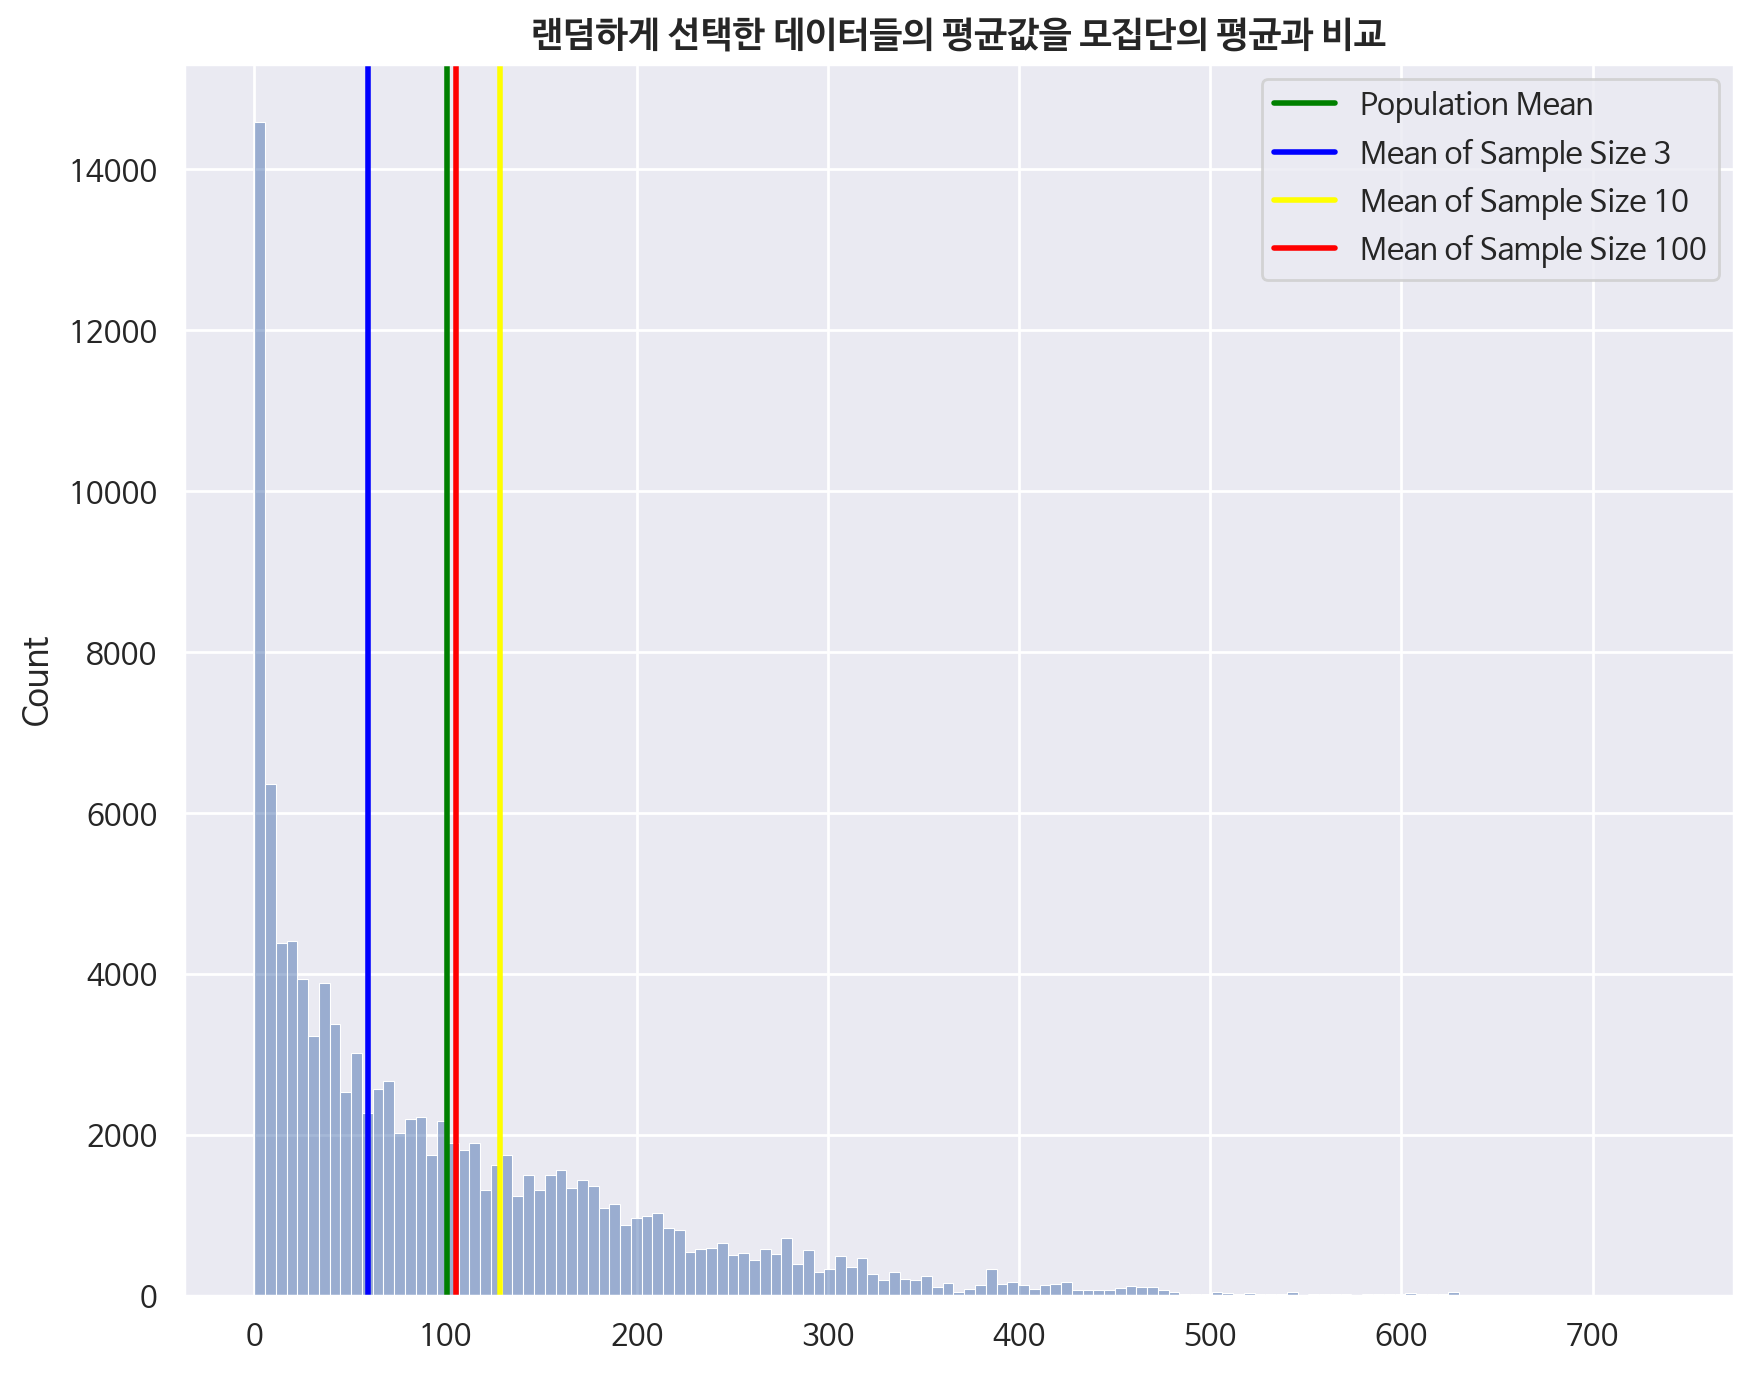

In [6]:
np.random.seed(42)

# 3, 10, 30개의 데이터 랜덤하게 선택
sample1 = np.random.choice(lead_time_value, 3)
sample2 = np.random.choice(lead_time_value, 10)
sample3 = np.random.choice(lead_time_value, 100)

# 랜덤하게 선택한 데이터들의 평균값 구한다
sample_mean_3 = sample1.mean()
sample_mean_10 = sample2.mean()
sample_mean_100 = sample3.mean()

# 랜덤하게 선택한 데이터들의 평균값을 모집단의 평균과 비교
plt.figure(figsize=(10,8))
sns.histplot(lead_time_value,alpha=0.5)
plt.axvline(lead_time_mean, c='green', lw=2, label='Population Mean')
plt.axvline(sample_mean_3, c='blue', lw=2, label='Mean of Sample Size 3')
plt.axvline(sample_mean_10, c='yellow', lw=2, label = 'Mean of Sample Size 10')
plt.axvline(sample_mean_100, c='red', lw=2, label = 'Mean of Sample Size 100')
plt.title("랜덤하게 선택한 데이터들의 평균값을 모집단의 평균과 비교", fontsize=13, fontweight="bold")
plt.legend()
plt.show()

## 2. 중심극한정리 (Central Limit Theorem)
- 무작위 column 3개를 선택하여, 분포를 확인하고 중심극한정리를 시각화 해보세요.

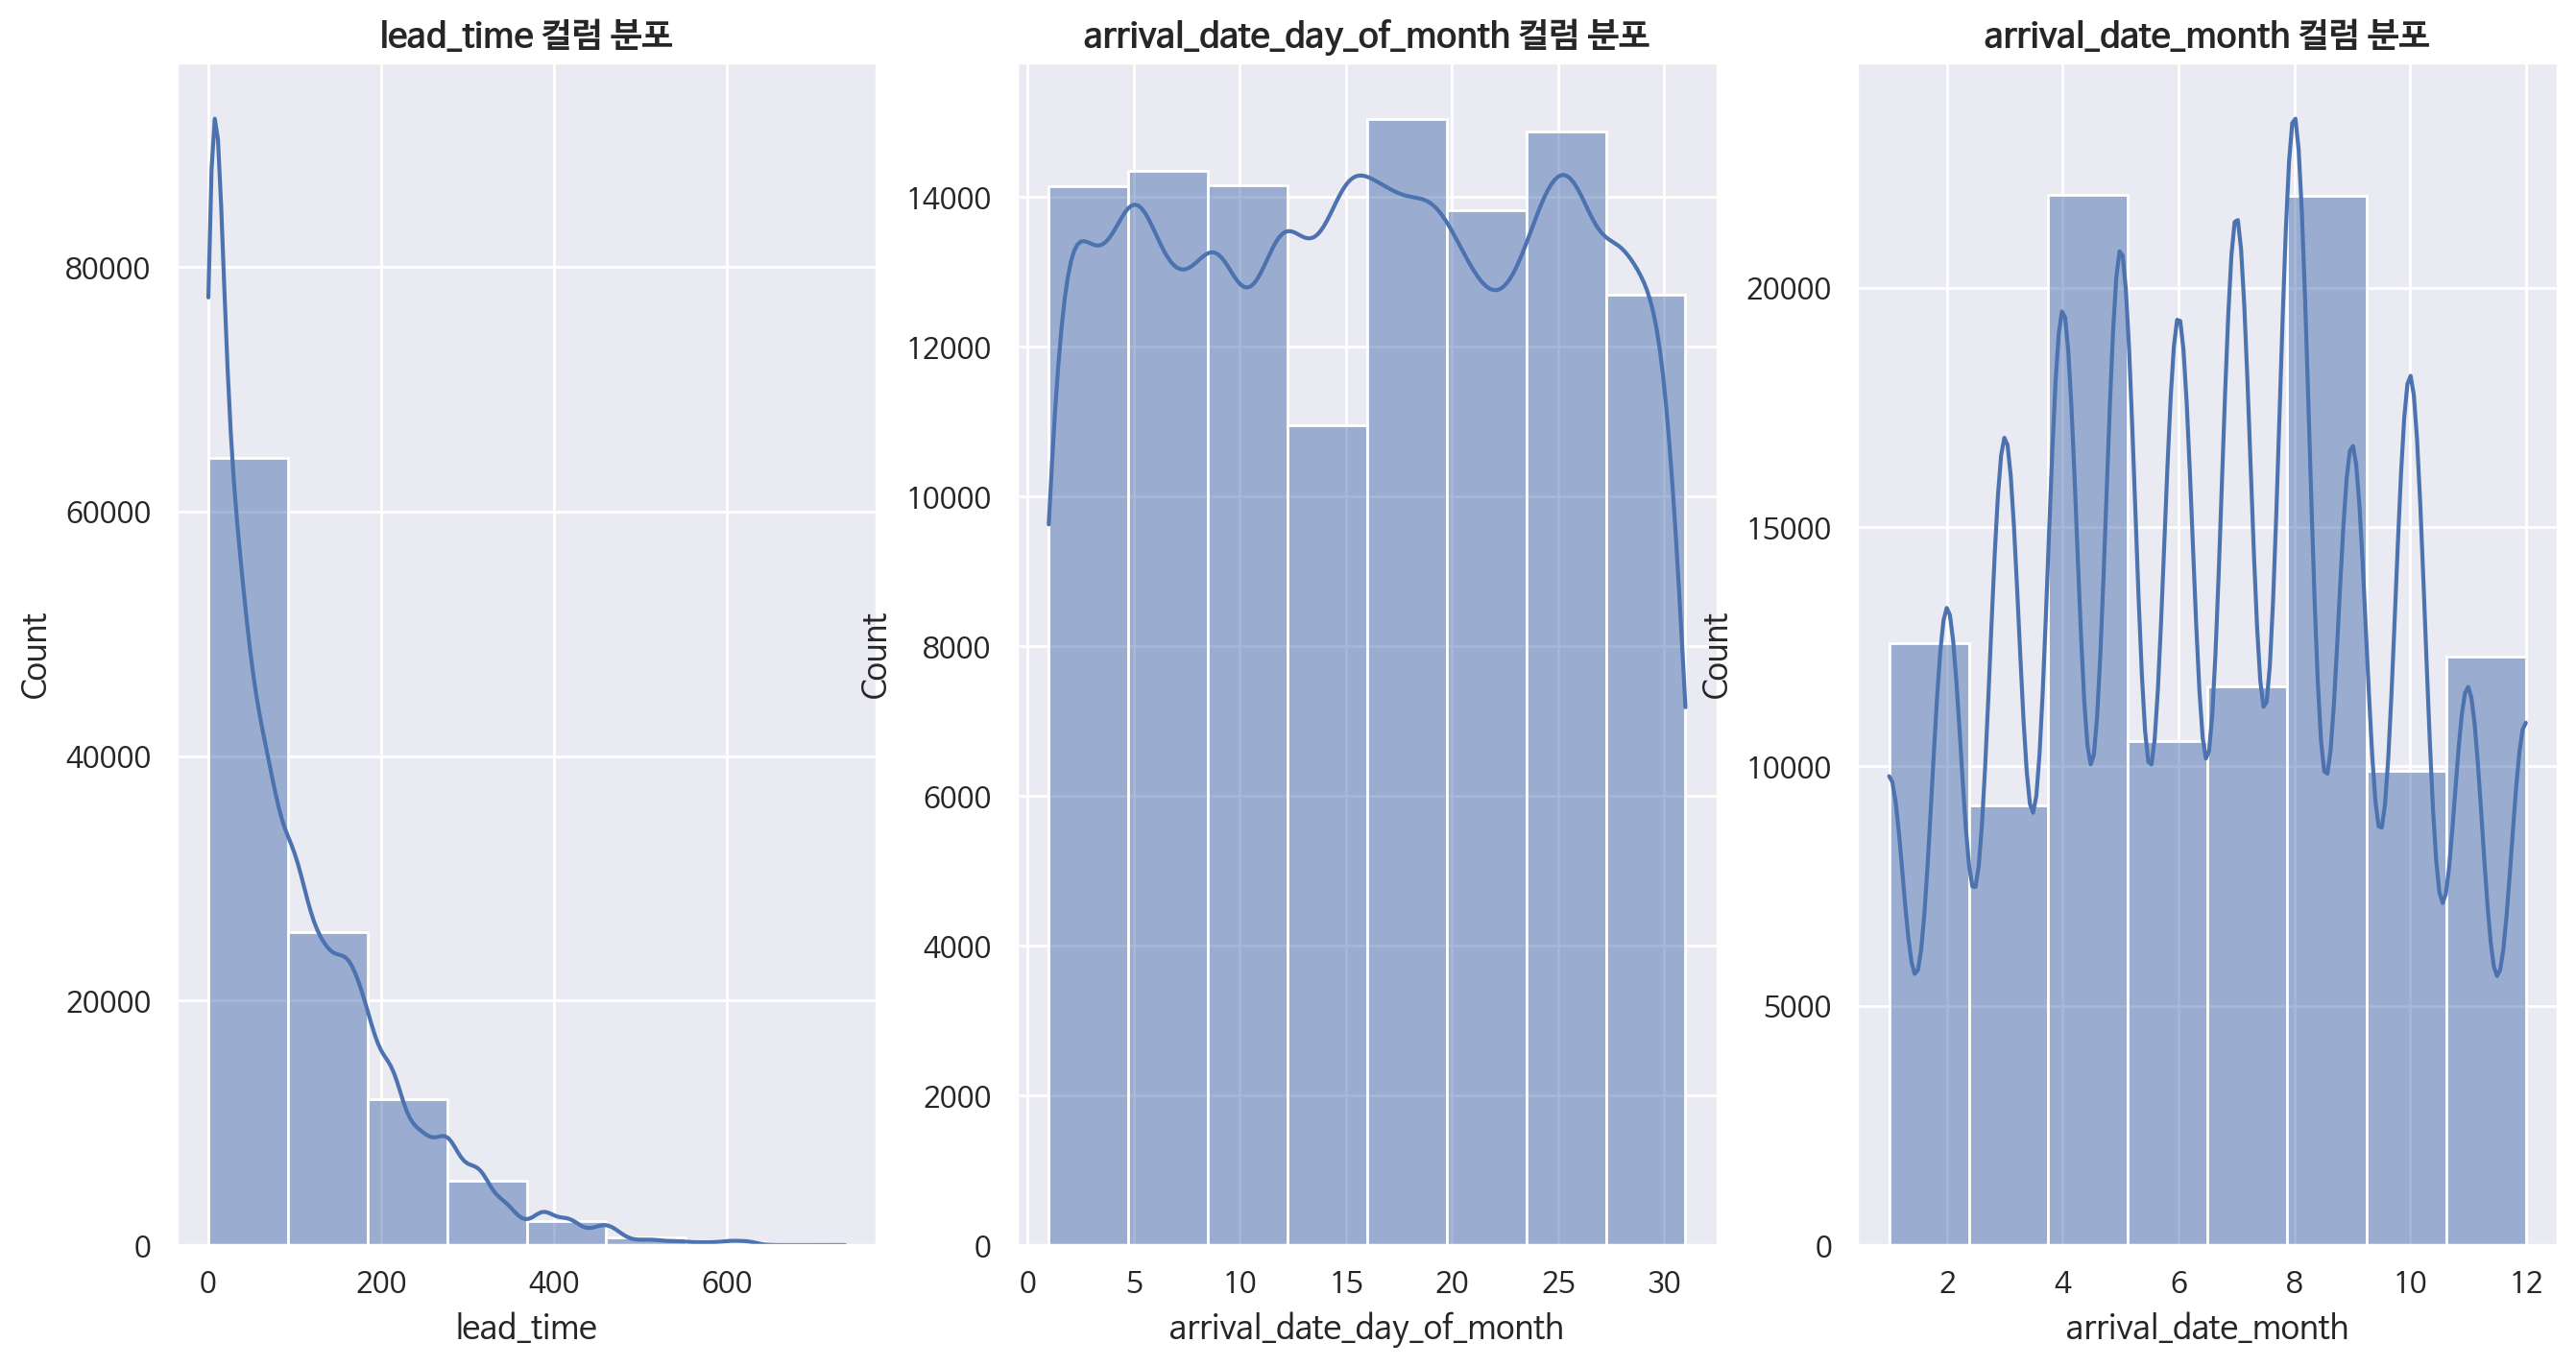

In [7]:
# 컬럼별 모집단 분포

# "lead_time", "arrival_date_day_of_month", "arrival_date_month" 컬럼 선정
clt_cols = ["lead_time", "arrival_date_day_of_month", "arrival_date_month"]

fig, ax = plt.subplots(1, 3, figsize=(16, 8))

for i, col in enumerate(clt_cols):
  sns.histplot(hotel[col], bins=8, ax=ax[i], kde=True)
  ax[i].set_title(f"{col} 컬럼 분포", fontsize=13, fontweight="bold");

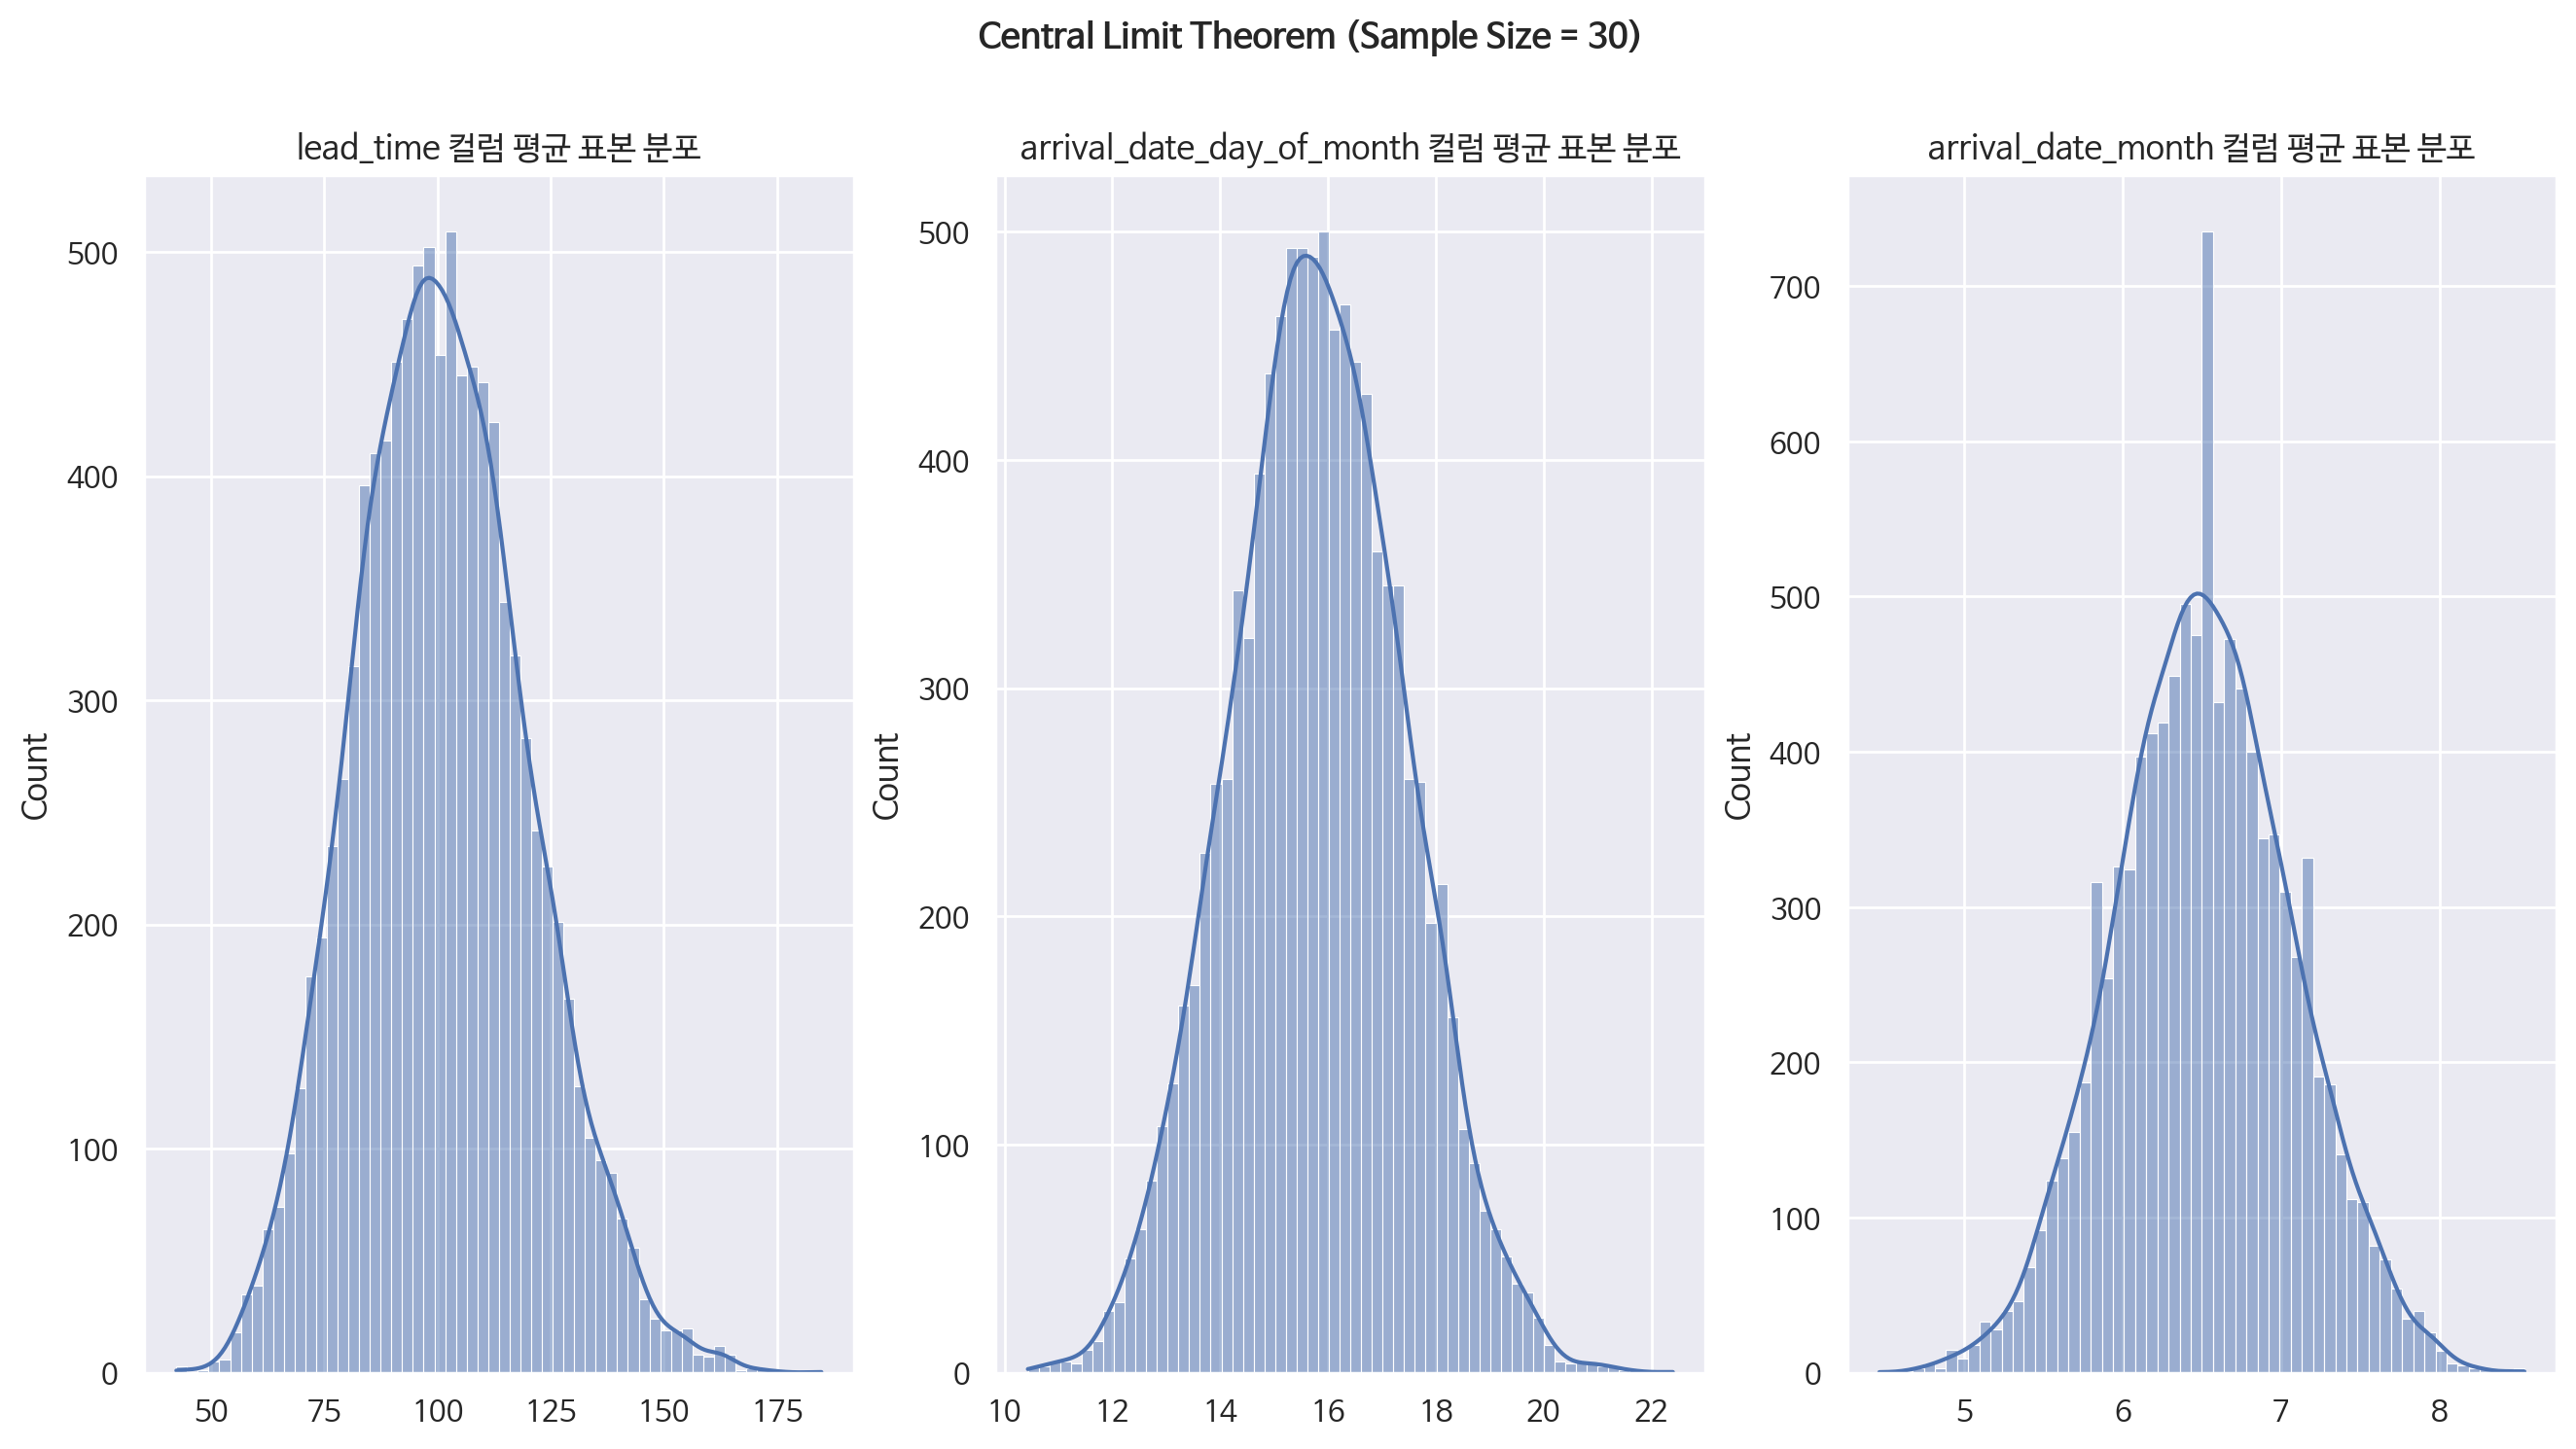

In [8]:
# 중심극한정리를 통해 정규분포 모양 갖는 것 확인

np.random.seed(42)

# lead_time 컬럼에서 샘플 추출하여 평균값 계산한 list
lt_means_size_30 = []

# arrival_date_day_of_month 컬럼에서 샘플 추출하여 평균값 계산한 list
add_means_size_30 = []

# arrival_date_month 컬럼에서 샘플 추출하여 평균값 계산한 list
adm_means_size_30 = []

for _ in range(10000):
  sample_lt = np.random.choice(hotel["lead_time"], 30)
  sample_add = np.random.choice(hotel["arrival_date_day_of_month"], 30)
  sample_adm = np.random.choice(hotel["arrival_date_month"], 30)
  
  # 각 평균값들을 빈 list에 삽입
  lt_means_size_30.append(sample_lt.mean())
  add_means_size_30.append(sample_add.mean())
  adm_means_size_30.append(sample_adm.mean())

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle("Central Limit Theorem (Sample Size = 30)", fontsize=13, fontweight="bold")

sns.histplot(lt_means_size_30, ax=axes[0], kde=True)
axes[0].set_title("lead_time 컬럼 평균 표본 분포")

sns.histplot(add_means_size_30, ax=axes[1], kde=True)
axes[1].set_title("arrival_date_day_of_month 컬럼 평균 표본 분포")

sns.histplot(adm_means_size_30, ax=axes[2], kde=True)
axes[2].set_title("arrival_date_month 컬럼 평균 표본 분포")
plt.show()

## 3. 카이제곱분포
- 1.2 중심극한정리에서 사용한 컬럼의 표본평균의 분포를 바탕으로, 자유도에 따른 카이제곱분포를 그려보세요

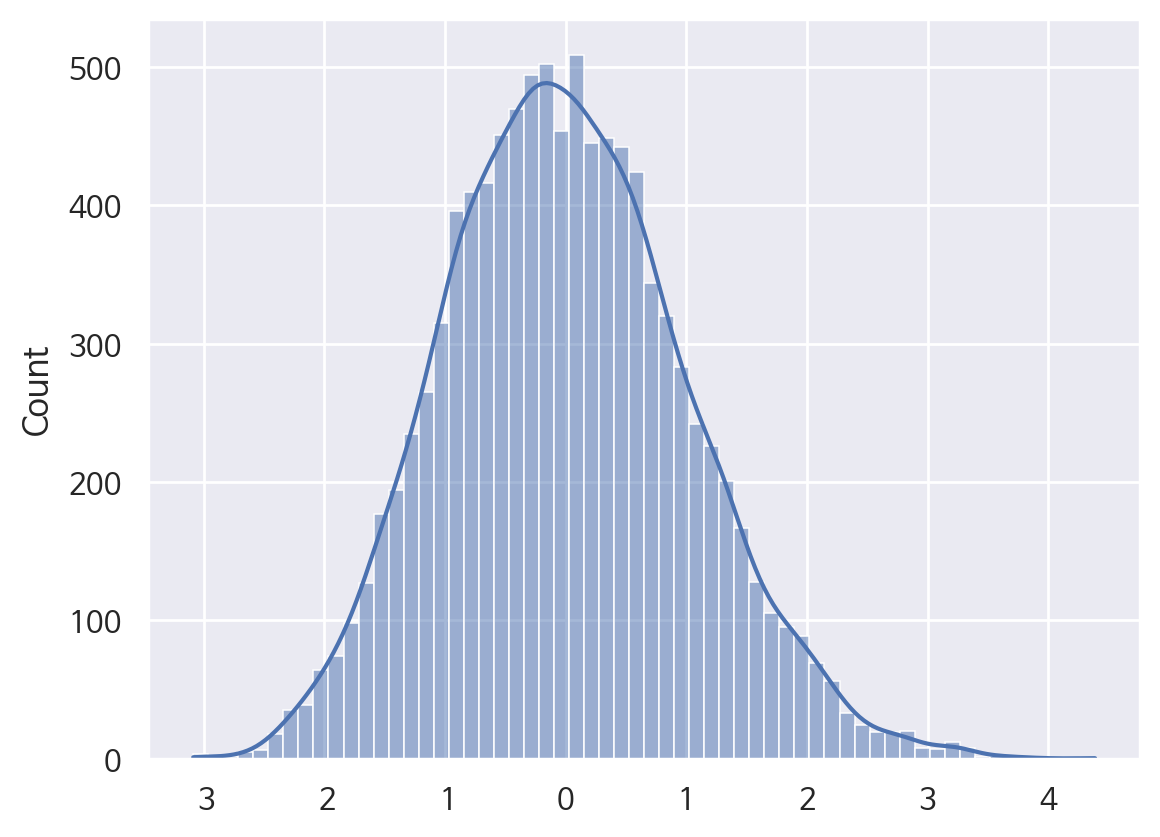

In [134]:
import scipy.stats as stats

X = lt_means_size_30

# 표준화 : stats.zscore()
X_std = stats.zscore(X)

# 표준화한 컬럼의 표본평균의 분포를 히스토그램으로 시각화하세요
sns.histplot(X_std, kde=True)
plt.show()

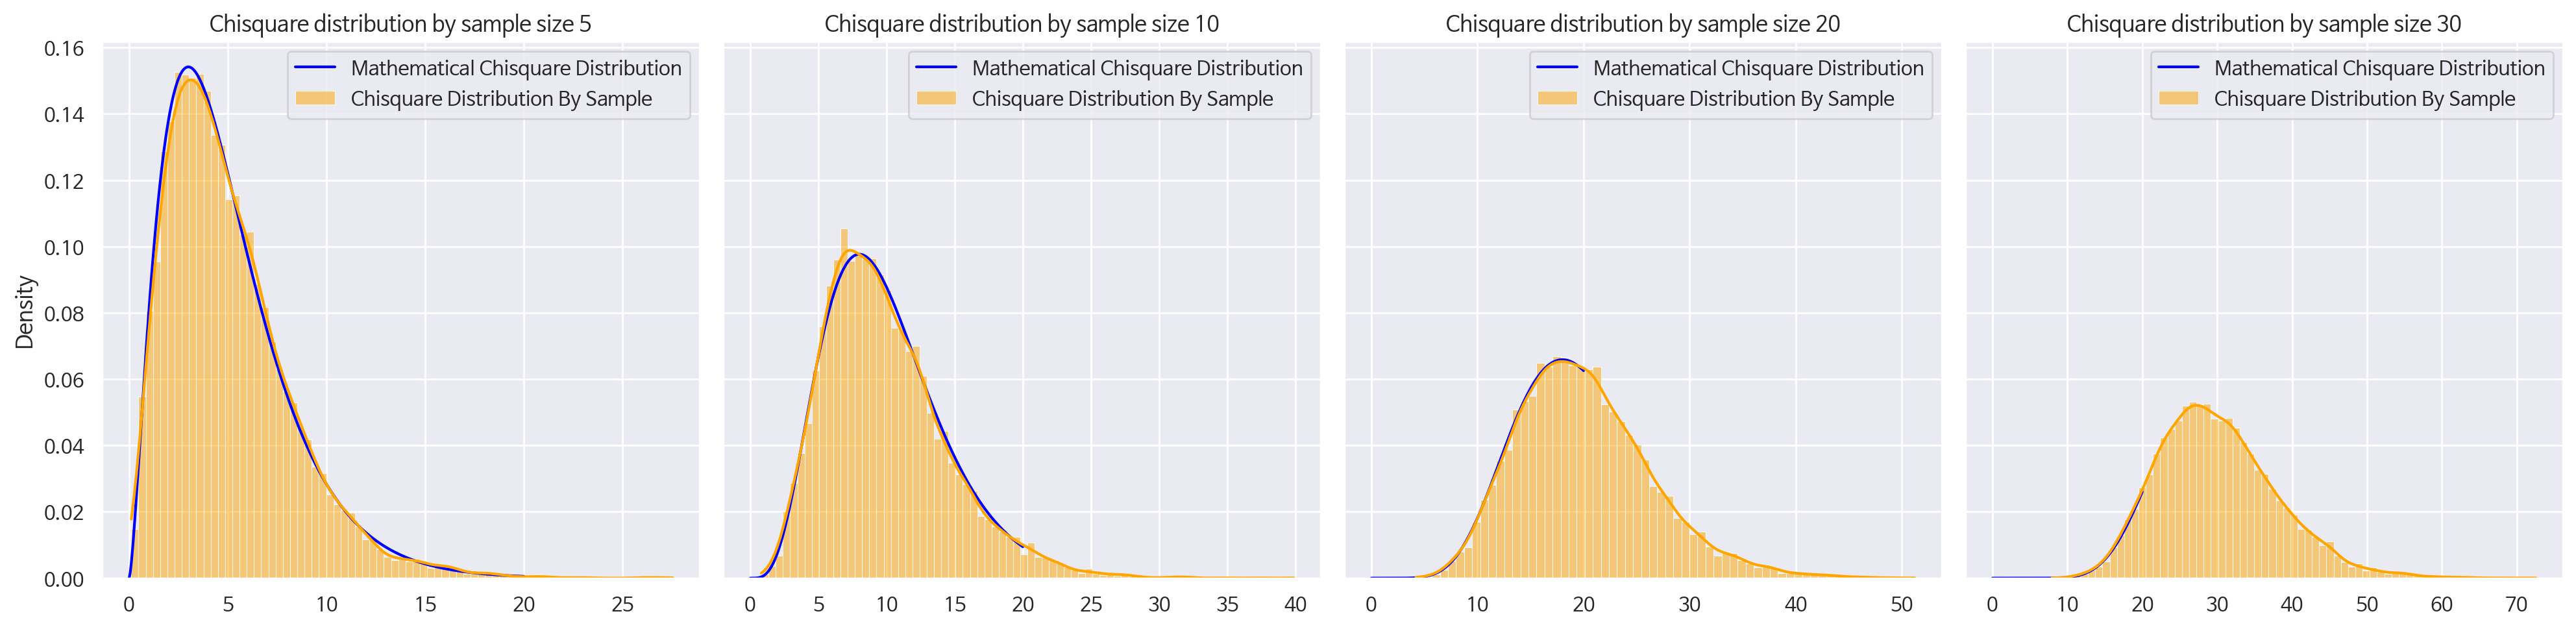

In [140]:
def plot_chisq(dof, ax, color='blue'):
    x = np.linspace(0, 20, 399)
    ax.plot(x, stats.chi2.pdf(x, dof), label="Mathematical Chisquare Distribution", color=color)

# 샘플에 따른 chisquare 분포를 그리는 함수
def chi_dist(ax, n_sample):
    xs = []
    ms = []
    xsqs = []

    # X_std = np.random.randn(10000)  # 표준 정규 분포를 따르는 데이터 생성

    for _ in range(10000):
        x = np.random.choice(X_std, n_sample)
        xs.append(x)
        ms.append(x.mean())
        xsqs.append((x * x).sum())

    xs = np.array(xs)
    ms = np.array(ms)
    xsqs = np.array(xsqs)

    # 수학적 Chisquare 분포를 그리기
    plot_chisq(n_sample, ax, color='blue')

    # 샘플링된 Chisquare 분포를 히스토그램과 KDE로 그리기
    sns.histplot(xsqs, ax=ax, kde=True, label="Chisquare Distribution By Sample", color='orange', stat="density")

    ax.set_title(f"Chisquare distribution by sample size {n_sample}")
    ax.legend()

# 샘플 크기 목록
sample_sizes = [5, 10, 20, 30]

# 그래프 설정
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(20, 5), sharey=True)

# 반복문을 통해 여러 샘플 크기에 대해 시각화
for ax, n_sample in zip(axes, sample_sizes):
    chi_dist(ax, n_sample)

plt.tight_layout()
plt.show()

In [ ]:
# 출처: https://daewonyoon.tistory.com/358 [알락블록:티스토리]